In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate

In [18]:
X,y = load_diabetes(as_frame=True, return_X_y=True)
X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20)
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [26]:
def evaluateModel(model, X, y):
  pred = model.predict(X)
  mse = mean_squared_error(y, pred)
  r2 = r2_score(y, pred)
  return mse, r2

lr = LinearRegression()
lr.fit(X_train, y_train)
mse, r2 = evaluateModel(lr, X_train, y_train)
print("LR   - Train      - MSE: %7.2f R2: %5.3f"%(mse,r2))
mse, r2 = evaluateModel(lr, X_vali, y_vali)
print("LR   - Validation - MSE: %7.2f R2: %5.3f"%(mse,r2))

LR   - Train      - MSE: 2704.62 R2: 0.546
LR   - Validation - MSE: 3607.83 R2: 0.378


In [6]:
def printTreeInfo(dt, X_train, y_train, X_vali, y_vali):
  mse, r2 = evaluateModel(dt, X_train, y_train)
  print("Tree - Train      - MSE: %7.2f R2: %5.3f"%(mse,r2))
  mse, r2 = evaluateModel(dt, X_vali, y_vali)
  print("Tree - Validation - MSE: %7.2f R2: %5.3f"%(mse,r2))
  print("Depth:", dt.get_depth(), " n_leaves:", dt.get_n_leaves())
  return mse, r2

dt = DecisionTreeRegressor().fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)


Tree - Train      - MSE:    0.00 R2: 1.000
Tree - Validation - MSE: 6025.42 R2: 0.026
Depth: 20  n_leaves: 345


(6025.4157303370785, 0.025632789378723153)

In [27]:
dt = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

Tree - Train      - MSE: 2732.60 R2: 0.542
Tree - Validation - MSE: 4459.73 R2: 0.231
Depth: 3  n_leaves: 8


(4459.7333169580215, 0.23078159427434952)

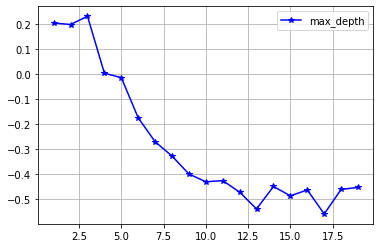

In [20]:
r2_list = []
#X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20)
for i in range(1, 20):
  dt = DecisionTreeRegressor(max_depth=i).fit(X_train, y_train)
  mse, r2 = evaluateModel(dt, X_vali, y_vali)
  r2_list.append(r2)
plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.legend()
plt.grid()
plt.show()

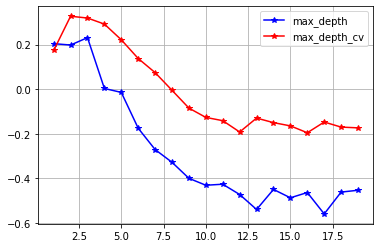

In [24]:
r2_cv = []
for i in range(1, 20):
  dt = DecisionTreeRegressor(max_depth=i)
  cv_results = cross_validate(dt, X, y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.plot(np.arange(1,len(r2_cv)+1), r2_cv,"r*-", label='max_depth_cv')
plt.legend()
plt.grid()
plt.show()

In [25]:
dt = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

dt = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

dt = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

Tree - Train      - MSE: 3114.47 R2: 0.478
Tree - Validation - MSE: 4651.37 R2: 0.198
Depth: 2  n_leaves: 4
Tree - Train      - MSE: 2732.60 R2: 0.542
Tree - Validation - MSE: 4459.73 R2: 0.231
Depth: 3  n_leaves: 8
Tree - Train      - MSE: 2189.32 R2: 0.633
Tree - Validation - MSE: 5780.53 R2: 0.003
Depth: 4  n_leaves: 16


(5780.528717376904, 0.002969736480802343)

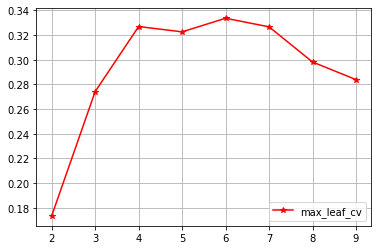

In [30]:
r2_cv = []
for i in range(2, 10, 1):
  dt = DecisionTreeRegressor(max_leaf_nodes=i)
  cv_results = cross_validate(dt, X, y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
#plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.plot(np.arange(2, 10, 1), r2_cv,"r*-", label='max_leaf_cv')
plt.legend()
plt.grid()
plt.show()

In [31]:
dt = DecisionTreeRegressor(max_leaf_nodes=4).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

dt = DecisionTreeRegressor(max_leaf_nodes=6).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

dt = DecisionTreeRegressor(max_leaf_nodes=20).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

Tree - Train      - MSE: 3114.47 R2: 0.478
Tree - Validation - MSE: 4651.37 R2: 0.198
Depth: 2  n_leaves: 4
Tree - Train      - MSE: 2884.77 R2: 0.516
Tree - Validation - MSE: 4757.34 R2: 0.179
Depth: 4  n_leaves: 6
Tree - Train      - MSE: 1828.96 R2: 0.693
Tree - Validation - MSE: 5769.82 R2: 0.005
Depth: 6  n_leaves: 20


(5769.820811091508, 0.004816644808300796)

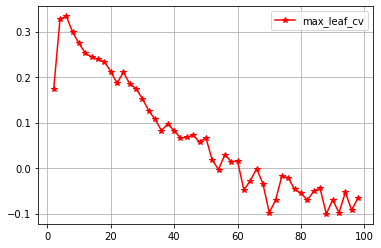

In [33]:
r2_cv = []
for i in range(2, 100, 2):
  dt = DecisionTreeRegressor(max_leaf_nodes=i, max_depth=10)
  cv_results = cross_validate(dt, X, y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
#plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.plot(np.arange(2, 100, 2), r2_cv,"r*-", label='max_leaf_cv')
plt.legend()
plt.grid()
plt.show()

Tree - Train      - MSE: 2884.77 R2: 0.516
Tree - Validation - MSE: 4757.34 R2: 0.179
Depth: 4  n_leaves: 6


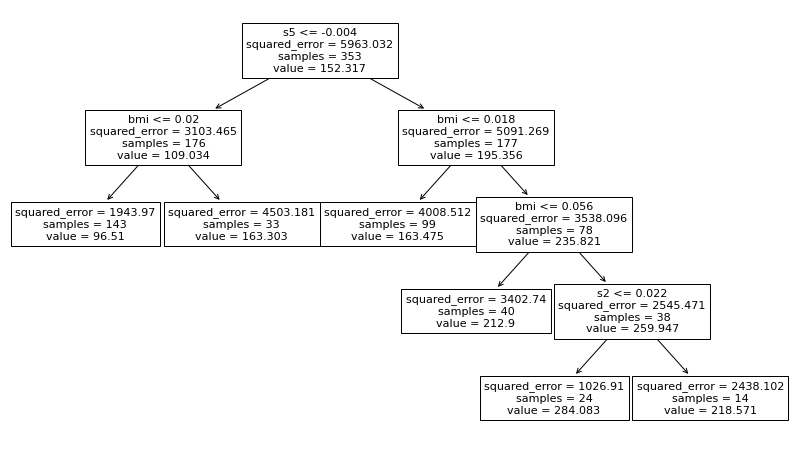

In [39]:
dt = DecisionTreeRegressor(max_leaf_nodes=6).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

from sklearn.tree import plot_tree

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns)
plt.show()

In [40]:
print(X_train.iloc[0])
print("Real:     ", y[0])
print("Predicted:", dt.predict(X_train.iloc[0].array.reshape(1,-1))[0])


print(X_train.iloc[1])
print("Real:     ", y[1])
print("Predicted:", dt.predict(X_train.iloc[1].array.reshape(1,-1))[0])


age    0.027178
sex   -0.044642
bmi    0.049840
bp    -0.055018
s1    -0.002945
s2     0.040648
s3    -0.058127
s4     0.052759
s5    -0.052959
s6    -0.005220
Name: 107, dtype: float64
Real:      151.0
Predicted: 163.3030303030303
age   -0.041840
sex    0.050680
bmi    0.014272
bp    -0.005671
s1    -0.012577
s2     0.006202
s3    -0.072854
s4     0.071210
s5     0.035462
s6    -0.013504
Name: 49, dtype: float64
Real:      75.0
Predicted: 163.4747474747475


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Tree - Train      - MSE: 2732.60 R2: 0.542
Tree - Validation - MSE: 4459.73 R2: 0.231
Depth: 3  n_leaves: 8


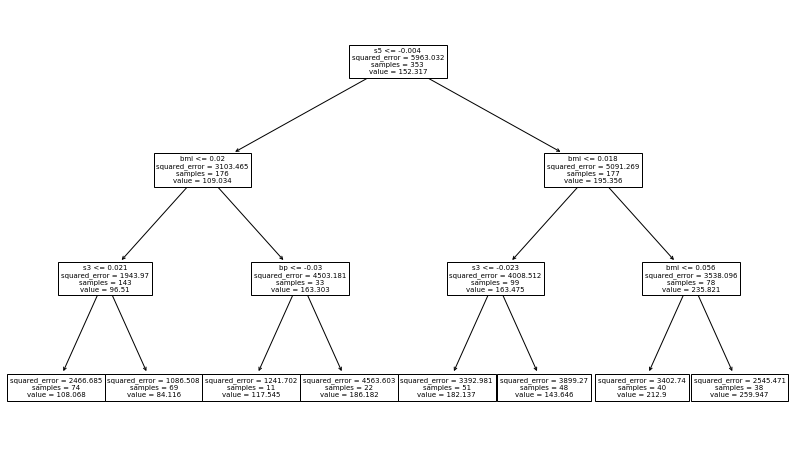

In [41]:
dt = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
printTreeInfo(dt, X_train, y_train, X_vali, y_vali)

from sklearn.tree import plot_tree

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns)
plt.show()

In [60]:
X_train, X_vali, y_train, y_vali = train_test_split(X,y, test_size=0.20)
clf = DecisionTreeRegressor(random_state=0)
#ccp_alphas= np.logspace(-10, 3)
ccp_alphas= np.arange(100, 601, 50)
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

[100 150 200 250 300 350 400 450 500 550 600]


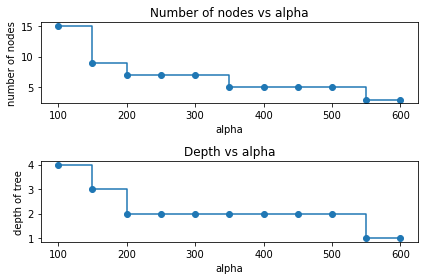

In [61]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

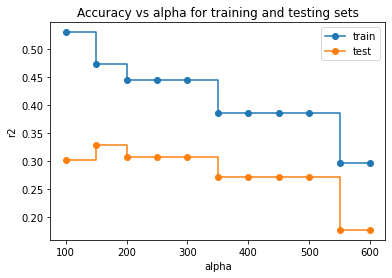

In [62]:
train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores  = [r2_score(y_vali, clf.predict(X_vali)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()